# Multiple Linear Regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

%matplotlib inline

## Load the data

In [25]:
data = pd.read_csv('real_estate_price_size_year.csv')

In [26]:
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
5,245050.280,575.19,2006
6,265129.064,570.89,2015
7,175716.480,620.82,2006
8,331101.344,682.26,2018
9,218630.608,694.52,2009


In [27]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## Create the regression

### Declare the dependent and the independent variables

In [28]:
y = data['price']
x1 = data[['size', 'year']] #since multiple variables, we take the dataframe with 2 of the independent
#variables as its columns

In [29]:
x1

,size,year
0,643.09,2015
1,656.22,2009
2,487.29,2018
3,1504.75,2015
4,1275.46,2009
5,575.19,2006
6,570.89,2015
7,620.82,2006
8,682.26,2018
9,694.52,2009


### Regression

In [30]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [31]:
x

,const,size,year
0,1.0,643.09,2015
1,1.0,656.22,2009
2,1.0,487.29,2018
3,1.0,1504.75,2015
4,1.0,1275.46,2009
5,1.0,575.19,2006
6,1.0,570.89,2015
7,1.0,620.82,2006
8,1.0,682.26,2018
9,1.0,694.52,2009


In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.77e-32
Time:                        17:51:15   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Adjusted R2 has increased by using another independent variable (year) to predict the price. The model now has a better explainatory power.

Moreover, we can see that the p-value of the coefficient is also less than 0.05 which suggest the variable - year is also significant in explaining the regression.

F-statstic is calculated to determine the significance of the model.
This can also be used to compare 2 models.

**the lower the F-statistic, the closer it is to a non-significant model.**

For, the f-statistic, the null hypothesis is that all the Beta(coefficients of independent variable) are equal to 0 simulatneously. The alternate being, at least one of the Beta value is non zero.

If all the Beta values are zero, the model has no merit. This is decided by the f-statistic's p-value. If it is greater than 0.05, then the null hypothesis is true and the model has no merits.

In [34]:
x.corr()

,const,size,year
const,NaN,NaN,NaN
size,NaN,1.000000,-0.097678
year,NaN,-0.097678,1.000000


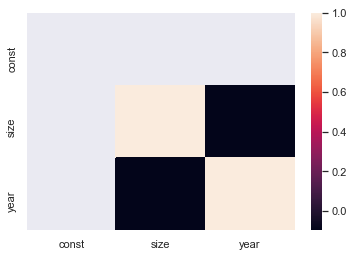

In [35]:
sns.heatmap(x.corr())